# Descriptive Statistics

Initialize data to analyze.

In [ ]:
source("notebooks/initialize-data-analysis.r")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

# Summary statistics, by thrombocytopenia status

In [ ]:
library(gtsummary)

# table_stats <- data_patient_transformed |>
#   select(
#     all_of(predictor_transformed), starts_with("comed"), flag_ADR_TP_ID
#   ) |>

#   tbl_summary(
#     by = flag_ADR_TP_ID,
#     statistic = list(all_continuous() ~ "{median} ({p25} - {p75})"),
#     missing = "no"
#   ) |>
#     add_overall() |>
#     bold_labels()


In [ ]:
predictor_list_descriptive <- data_patient_transformed |>
  select(patient_age_per_10, patient_sex, patient_weight_per_10, dept_ICU_ER, dept_other, comorb_HTN, comorb_DM, comorb_HF, comorb_angina, comorb_cirr, comorb_COPD, comorb_CVA, comorb_MI, comorb_K, invasive_ETI, invasive_CVC, invasive_IHD, invasive_CRRT, baseline_WBC_per_10, baseline_HGB_per_10, baseline_PLT_per_10, baseline_CLCR_per_10, baseline_CLCR_factor, infect_HAP, infect_septicemia, infect_SSTI, infect_sepsis, infect_CAP, infect_CNS, infect_UTI, infect_IAI, infect_BJI, LZD_dose_per_weight, LZD_duration, LZD_route_IV, comed_carbapenem, comed_levofloxacin, comed_teicoplanin, comed_daptomycin, comed_ibuprofen, comed_tacrolimus, comed_valproic, comed_carbamazepin, comed_quetiapin, comed_enoxaparin, comed_heparin, comed_clopidogrel, comed_rifampin, comed_pyrazinamid) |>
  colnames()

table_stats_final <- data_patient_transformed |>
  select(all_of(predictor_list_descriptive), flag_ADR_TP_ID) |>
  mutate(
    flag_ADR_TP_ID = factor(flag_ADR_TP_ID, levels = c(FALSE, TRUE), labels = c("No LAT event", "LAT event")),
    baseline_CLCR_factor = factor(
      baseline_CLCR_factor,
      levels = c(
        "CLCR < 30",
        "30 <= CLCR < 60",
        "60 <= CLCR < 90",
        "90 <= CLCR < 130",
        "CLCR >= 130"
    ))) |>
  tbl_summary(
    by = flag_ADR_TP_ID,
    statistic = list(all_continuous() ~ "{median} ({p25} - {p75})"),
    digits = all_continuous() ~ partial(style_sigfig, digits = 2),
    missing = "no"
  ) |>
  add_overall() |>
  bold_labels()


Univariate logistic regression, by thrombocytopenia status.

In [ ]:
library(tidymodels)


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

Loading required package: future

In [ ]:
plan(multisession, workers = max(min(parallel::detectCores() - 1, 10), 2))
uni_model_list_final <- future_map(predictor_list_descriptive, fit_univariate_regression)
table_uni_list_final <- future_map(uni_model_list_final, arrange_univariate_regression)


Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit wit

Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit wit

Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`

Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`

Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`

Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`

Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`
Extracting {parsnip} model fit with `tbl_regression(x = x$fit, ...)`

Print and save results.

In [ ]:
# table_descriptive <- tbl_merge(
#   list(table_stats, table_uni),
#   tab_spanner = c(
#     "**Thrombocytopenia Status**",
#     "**Univariate Regression**"
#   )
# )

# table_descriptive

# save(table_descriptive, file = "data/results/table-descriptive.rda")


In [ ]:
table_descriptive_final <- tbl_merge(
  list(table_stats_final, table_uni_final),
  tab_spanner = c(
    "**Thrombocytopenia Status**",
    "**Univariate Regression**"
  )
) |>
  modify_table_body(
    ~ .x |>
      mutate(label = case_match(
        label,
        "patient_age_per_10" ~ "Age (10 yrs)",
        "patient_sex" ~ "Female Sex",
        "patient_weight_per_10" ~ "Weight (10 kg)",
        "dept_ICU_ER" ~ "ICU",
        "dept_other" ~ "Other",
        "comorb_HTN" ~ "Hypertension",
        "comorb_DM" ~ "Diabetes",
        "comorb_HF" ~ "Heart Failure",
        "comorb_angina" ~ "Angina",
        "comorb_cirr" ~ "Cirrhosis",
        "comorb_COPD" ~ "COPD",
        "comorb_CVA" ~ "Cerebral Vascular Accident",
        "comorb_MI" ~ "Myocardial Infarction",
        "comorb_K" ~ "Malignancies",
        "invasive_ETI" ~ "Endotracheal Intubation",
        "invasive_CVC" ~ "Central Venous Catheter",
        "invasive_IHD" ~ "Intermittent Hemodialysis",
        "invasive_CRRT" ~ "Continuous Renal Replacement Therapy",
        "baseline_WBC_per_10" ~ "WBC (10 G/L)",
        "baseline_HGB_per_10" ~ "HGB (10 G/L)",
        "baseline_PLT_per_10" ~ "PLT (10 G/L)",
        "baseline_CLCR_per_10" ~ "CLCR (10 mL/min)",
        "baseline_CLCR_factor" ~ "Kidney Function",
        "infect_HAP" ~ "Hospital-Acquired Pneumonia",
        "infect_septicemia" ~ "Septicemia",
        "infect_SSTI" ~ "Skin and Soft Tissue Infection",
        "infect_sepsis" ~ "Sepsis",
        "infect_CAP" ~ "Community-Acquired Pneumonia",
        "infect_CNS" ~ "Central Nervous System Infection",
        "infect_UTI" ~ "Urinary Tract Infection",
        "infect_IAI" ~ "Intra-Abdominal Infection",
        "infect_BJI" ~ "Bone and Joint Infection",
        "LZD_dose_per_weight" ~ "Dose (mg/kg)",
        "LZD_duration" ~ "Duration (days)",
        "LZD_route_IV" ~ "IV Route",
        "comed_carbapenem" ~ "Carbapenem",
        "comed_levofloxacin" ~ "Levofloxacin",
        "comed_teicoplanin" ~ "Teicoplanin",
        "comed_daptomycin" ~ "Daptomycin",
        "comed_ibuprofen" ~ "Ibuprofen",
        "comed_tacrolimus" ~ "Tacrolimus",
        "comed_valproic" ~ "Valproic Acid",
        "comed_carbamazepin" ~ "Carbamazepine",
        "comed_quetiapin" ~ "Quetiapine",
        "comed_enoxaparin" ~ "Enoxaparin",
        "comed_heparin" ~ "Heparin",
        "comed_clopidogrel" ~ "Clopidogrel",
        "comed_rifampin" ~ "Rifampin",
        "comed_pyrazinamid" ~ "Pyrazinamide",
        .default = label
      ))
  ) |>
  tbl_split(variables = c(patient_weight_per_10, dept_other, comorb_K, invasive_CRRT, baseline_CLCR_factor, infect_BJI, LZD_route_IV)) |>
  structure(class = c("tbl_stack", "list")) |>
  tbl_stack(group_header = c("Demographics", "Clinical Department", "Comorbidities", "Invasive Procedures", "Laboratory Tests", "Existing Infections", "Linezolid Use", "Comedications")) |>
  bstfun::bold_italicize_group_labels(bold = TRUE)


ℹ gtsummary table has been converted class "gt"

Summary statistics, by site.

In [ ]:
# table_descriptive_site <- data_patient_transformed |>
#   select(
#     all_of(predictor_transformed), starts_with("comed"), flag_ADR_TP_ID, site, ADR_CTCAE_max, ADR_onset_first, ADR_PLT_ratio
#   ) |>
#   tbl_summary(
#     by = site,
#     statistic = list(all_continuous() ~ "{median} ({p25} - {p75})"),
#     missing = "no"
#   ) |>
#   add_overall() |>
#   bold_labels() |>
#   add_p(
#     test.args = all_tests("fisher.test") ~ list(simulate.p.value = TRUE)
#   ) |>
#   bold_p()

# table_descriptive_site

# save(table_descriptive_site, file = "data/results/table-descriptive-site.rda")


# Correlation matrix

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

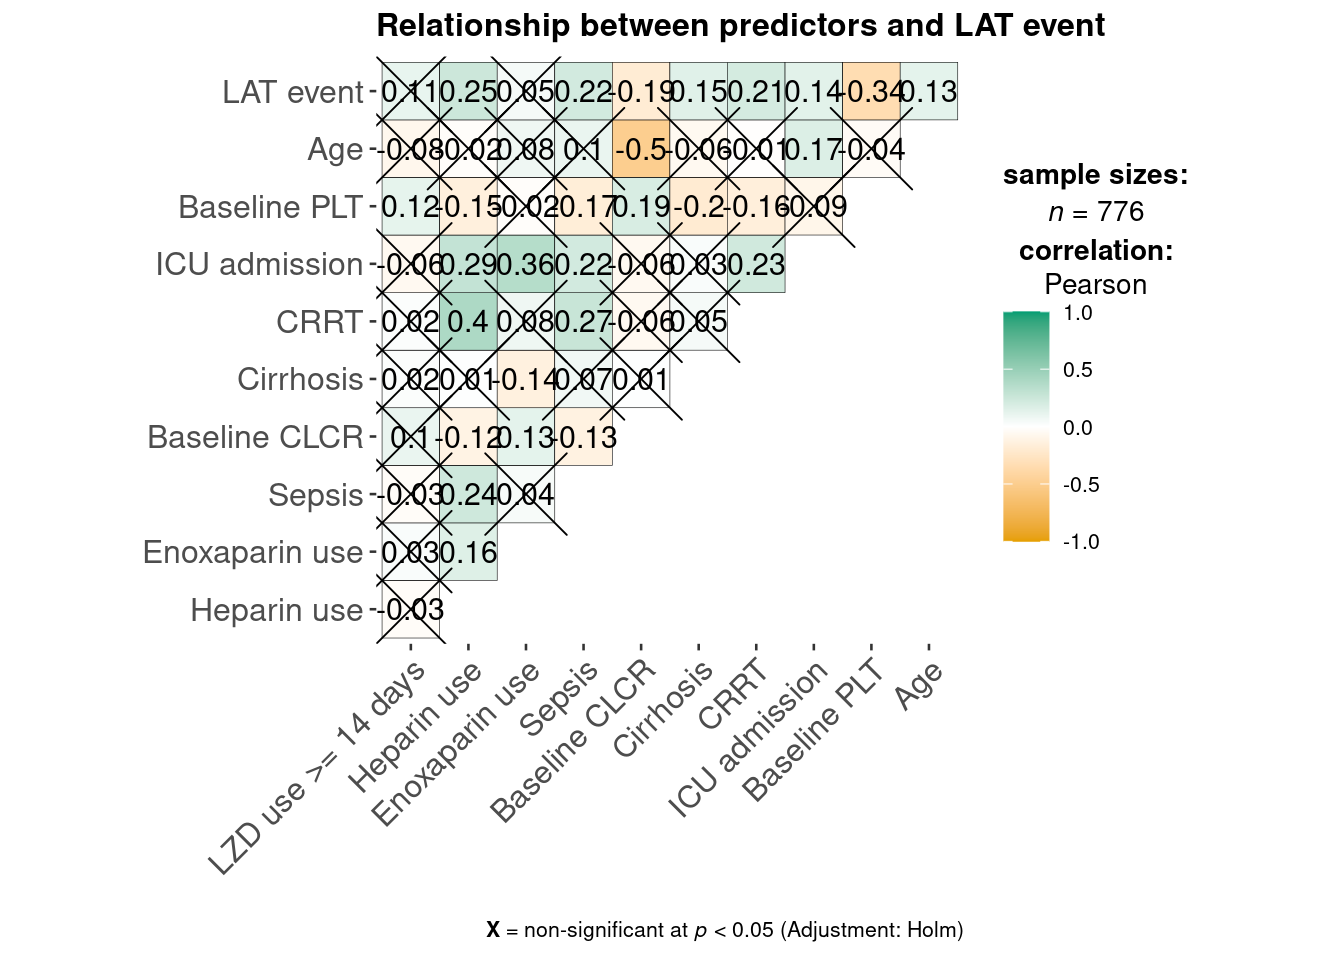

In [ ]:
library(ggstatsplot)


Registered S3 method overwritten by 'ggside':
  method from   
  +.gg   ggplot2

`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula = 'y ~ x'
`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula = 'y ~ x'
`stat_xsidebin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_ysidebin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula = 'y ~ x'

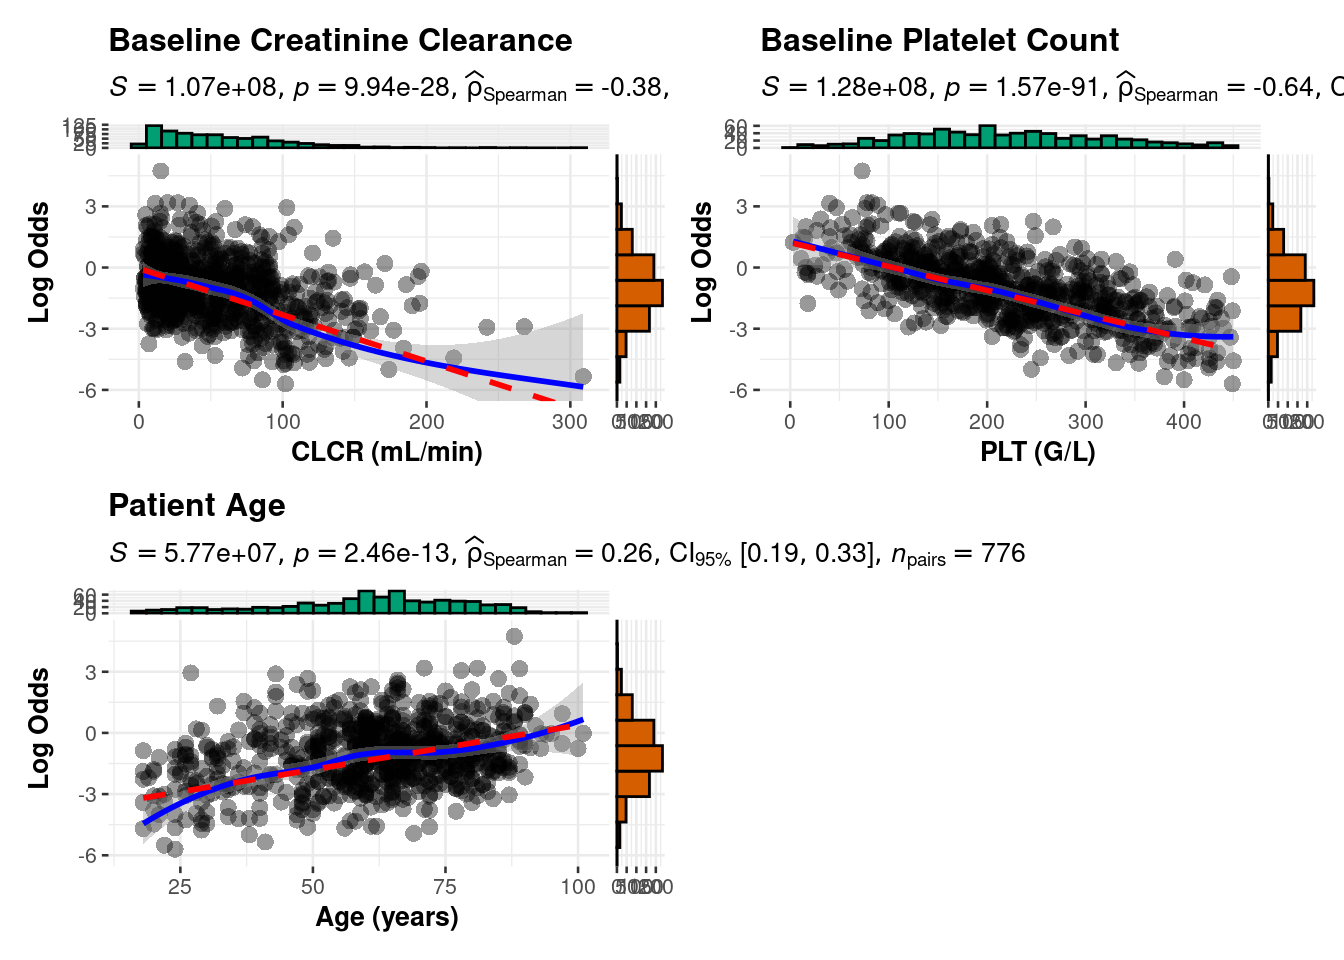

In [ ]:
# uni_model_list[[1]] |>
#   extract_fit_engine() |>
#   _$terms |>
#   attr("term.labels")

# data_patient_transformed |>
#   select(all_of(variables_to_screen_all), flag_ADR_TP_ID) |>
#   mutate(
#     probabilities = predict(data_patient_transformed |>
#       select(all_of(variables_to_screen_all), flag_ADR_TP_ID) |>
#       glm(
#         formula = reformulate(
#           termlabels = variables_to_screen_all,
#           response = "flag_ADR_TP_ID"
#         ),
#         family = binomial
#       ), type = "response"),
#     log_odds = log(probabilities / (1 - probabilities))
#   ) |>
#   select(all_of(variables_to_screen_short), log_odds, probabilities) |>
#   select(where(is.numeric), log_odds, probabilities) |>
#   gather(key = "predictors", value = "predictor_value", -log_odds, -probabilities) |>
#   ggplot(aes(y = log_odds, x = predictor_value)) +
#   geom_point(size = 0.5, alpha = 0.5) +
#   geom_smooth(method = "loess", color = "red") +
#   geom_smooth(method = "lm", linetype = "dashed", color = "blue", se = FALSE) +
#   theme_bw() +
#   facet_wrap(~predictors, scales = "free_x") +
#   scale_y_continuous(limits = c(-5, 5)) +
#   labs(title = "Best Predictive Model 1-A", x = "Predictor Value", y = "Log Odds")

library(purrr)

plot_odds_by_numeric_list <- pmap(
  .l = list(
    data = data_patient_transformed |>
      select(all_of(variables_to_screen_all), flag_ADR_TP_ID) |>
      mutate(
        probabilities = predict(data_patient_transformed |>
          select(all_of(variables_to_screen_all), flag_ADR_TP_ID) |>
          glm(
            formula = reformulate(
              termlabels = variables_to_screen_all,
              response = "flag_ADR_TP_ID"
            ),
            family = binomial
          ), type = "response"),
        log_odds = log(probabilities / (1 - probabilities))
      ) |>
      select(all_of(variables_to_screen_short), log_odds, probabilities) |>
      select(where(is.numeric), log_odds, probabilities) |>
      pivot_longer(c(-log_odds, -probabilities), names_to = "predictors", values_to = "predictor_value") |>
      split(f = ~predictors, drop = TRUE),
    x = "predictor_value",
    y = "log_odds",
    xlab = list("CLCR (mL/min)", "PLT (G/L)", "Age (years)"),
    ylab = "Log Odds",
    smooth.line.args = list(
      list(linewidth = 1, color = "blue", method = "loess", formula = y ~ x)
    ),
    title = list("Baseline Creatinine Clearance", "Baseline Platelet Count", "Patient Age"),
    type = "nonparametric"
  ),
  .f = ggscatterstats
)


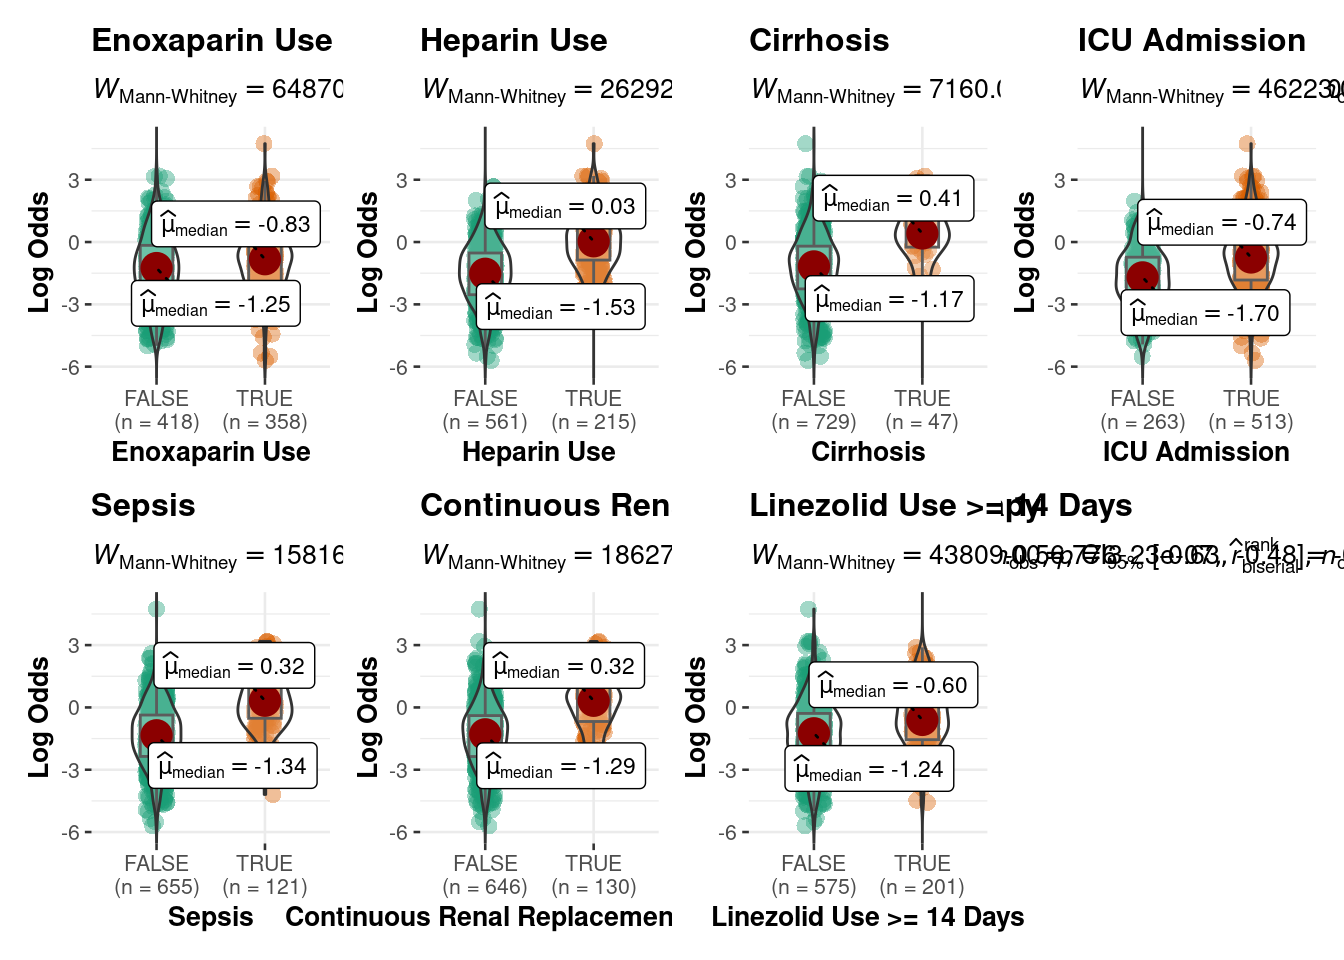

In [ ]:
library(purrr)

plot_odds_by_binary_list <- pmap(
  .l = list(
    data = data_patient_transformed |>
      select(all_of(variables_to_screen_all), flag_ADR_TP_ID) |>
      mutate(
        probabilities = predict(data_patient_transformed |>
          select(all_of(variables_to_screen_all), flag_ADR_TP_ID) |>
          glm(
            formula = reformulate(
              termlabels = variables_to_screen_all,
              response = "flag_ADR_TP_ID"
            ),
            family = binomial
          ), type = "response"),
        log_odds = log(probabilities / (1 - probabilities))
      ) |>
      select(all_of(variables_to_screen_short), log_odds, probabilities) |>
      select(where(is.logical), log_odds, probabilities) |>
      pivot_longer(c(-log_odds, -probabilities), names_to = "predictors", values_to = "predictor_value") |>
      split(f = ~predictors, drop = TRUE),
    x = "predictor_value",
    y = "log_odds",
    xlab = list("Enoxaparin Use", "Heparin Use", "Cirrhosis", "ICU Admission", "Sepsis", "Continuous Renal Replacement Therapy", "Linezolid Use >= 14 Days"),
    ylab = "Log Odds",
    smooth.line.args = list(
      list(linewidth = 1, color = "blue", method = "loess", formula = y ~ x)
    ),
    title = list("Enoxaparin Use", "Heparin Use", "Cirrhosis", "ICU Admission", "Sepsis", "Continuous Renal Replacement Therapy", "Linezolid Use >= 14 Days"),
    type = "nonparametric"
  ),
  .f = ggbetweenstats
)

complete_plot_odds_by_binary <- function(plot) {
  plot +
    coord_cartesian(ylim = c(-6, 5))
}

plot_odds_by_binary <- map(plot_odds_by_binary_list, complete_plot_odds_by_binary) |>
  combine_plots(plotgrid.args = list(nrow = 2, ncol = 4))

plot_odds_by_binary


(`stat_bin()`).

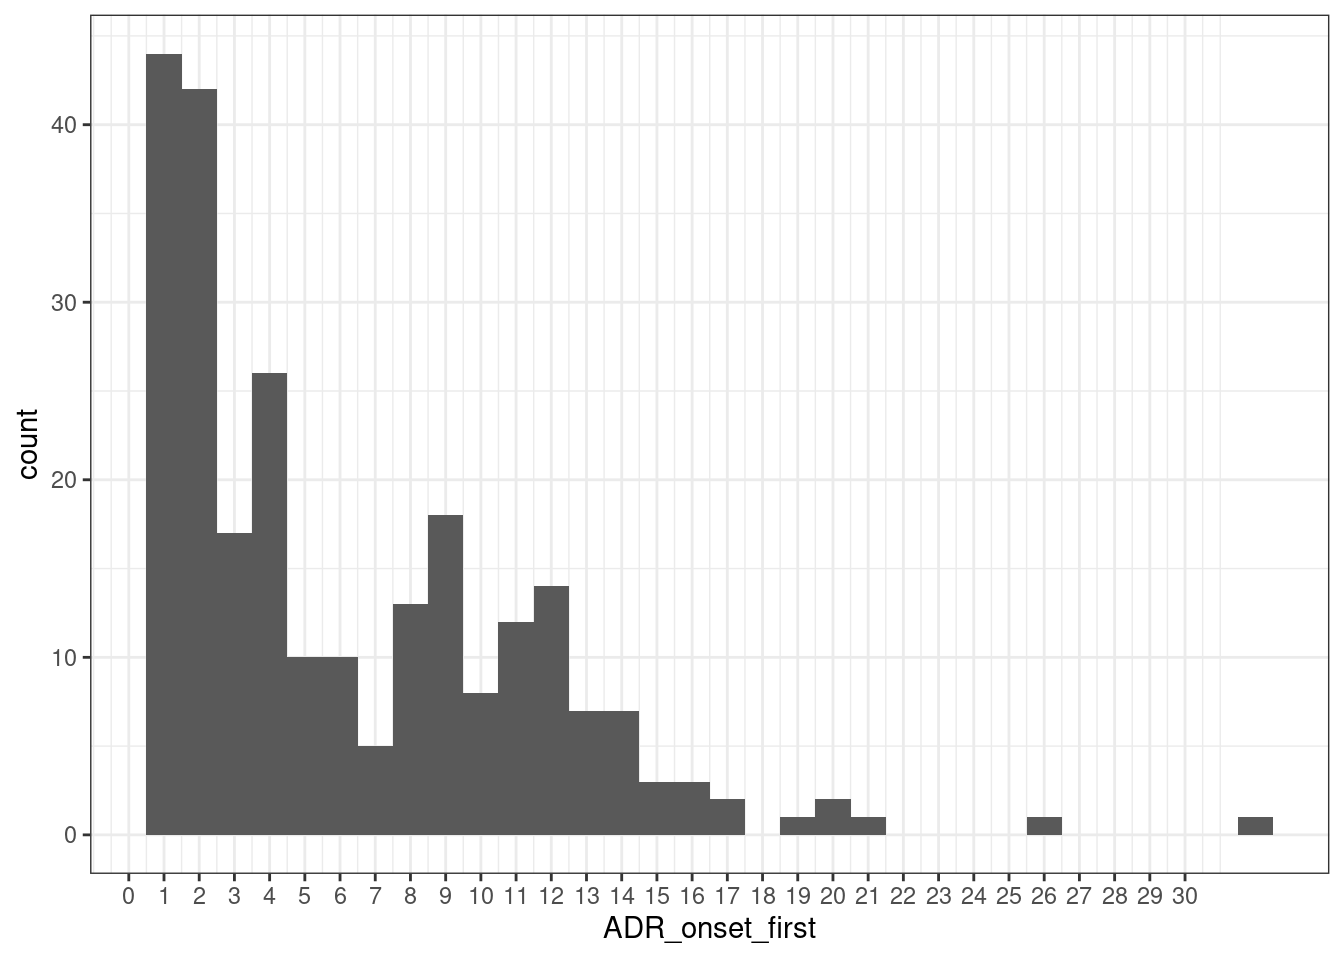

(`stat_bin()`).

(`stat_density()`).

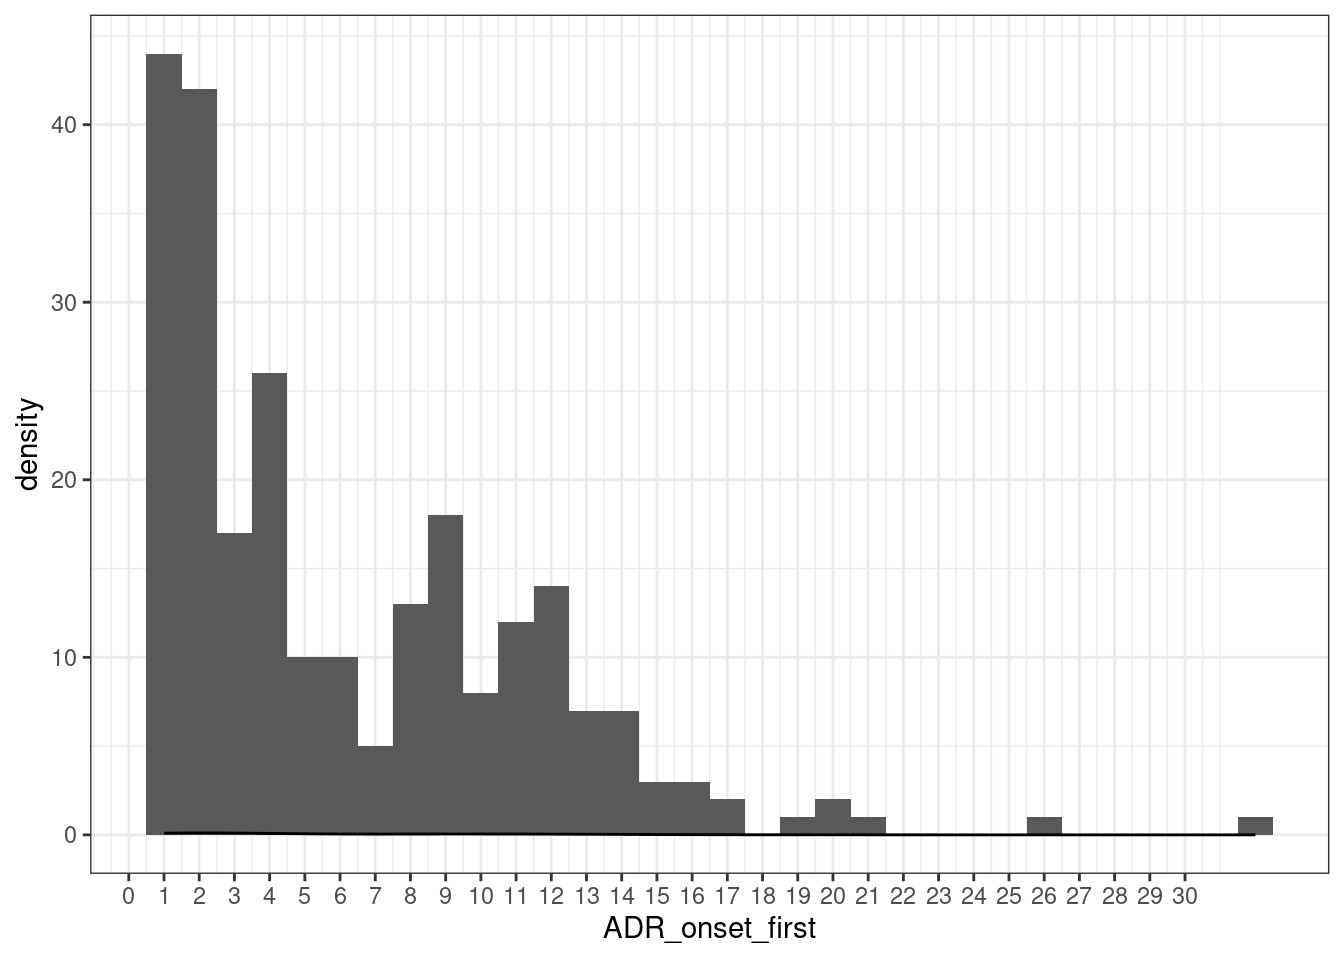

In [ ]:
data_patient_complete |>
  select(ADR_onset_first) |>
  ggplot(aes(x = ADR_onset_first)) +
  geom_histogram(binwidth = 1) +
  scale_x_continuous(breaks = seq(0, 30, 1)) +
  theme_bw()


# For ND site

In [ ]:
# load("data/data-cleaned/data-cleaned-ND.rda")
# source("notebooks/initialize-data-analysis.r")
# library(tidyverse)
# library(tidymodels)
# library(gtsummary)
# library(furrr)

# data_patient_transformed_ND <- data_patient_complete_ND |>
#   mutate(
#     baseline_HGB_per_10 = baseline_HGB / 10,
#     baseline_WBC_per_10 = baseline_WBC / 10,
#     baseline_PLT_per_10 = baseline_PLT / 10,
#     baseline_CLCR_per_10 = baseline_CLCR / 10,
#     patient_age_per_10 = patient_age / 10,
#     patient_age_65 = patient_age >= 65,
#     patient_age_60 = patient_age >= 60,
#     patient_weight_per_10 = patient_weight / 10,
#     patient_weight_50 = patient_weight < 50,
#     baseline_CLCR_60 = baseline_CLCR < 60,
#     baseline_CLCR_30 = baseline_CLCR < 30,
#     baseline_PLT_200 = baseline_PLT < 200,
#     baseline_PLT_150 = baseline_PLT < 150,
#     LZD_duration_factor = case_when(
#       LZD_duration < 10 ~ 1,
#       LZD_duration >= 10 & LZD_duration < 14 ~ 2,
#       LZD_duration >= 14 ~ 3
#     ) |> as.factor(),
#     LZD_duration_7 = LZD_duration >= 7,
#     LZD_duration_10 = LZD_duration >= 10,
#     LZD_duration_14 = LZD_duration >= 14,
#     LZD_route_IV = LZD_route == "IV",
#     baseline_CLCR_factor = case_when(
#       baseline_CLCR < 30 ~ "CLCR < 30",
#       baseline_CLCR >= 30 & baseline_CLCR < 60 ~ "30 <= CLCR < 60",
#       baseline_CLCR >= 60 & baseline_CLCR < 90 ~ "60 <= CLCR < 90",
#       baseline_CLCR >= 90 & baseline_CLCR < 130 ~ "90 <= CLCR < 130",
#       baseline_CLCR >= 130 ~ "CLCR >= 130"
#     ) |> as.factor(),
#     baseline_CLCR_factor = factor(baseline_CLCR_factor, levels = c("90 <= CLCR < 130", "CLCR < 30", "30 <= CLCR < 60", "60 <= CLCR < 90", "CLCR >= 130")),
#   ) |>
#   mutate(
#     patient_age_group = case_when(
#       patient_age >= 18 & patient_age <= 44 ~ "18-44",
#       patient_age >= 45 & patient_age <= 64 ~ "45-64",
#       patient_age >= 65 ~ "> 65"
#     )
#   )

# table_stats_ND <- data_patient_transformed_ND |>
#   select(
#     all_of(predictor_transformed), LZD_route_IV, starts_with("comed"), flag_ADR_TP_ID, -LZD_route, charlson, baseline_CLCR, baseline_CLCR_factor, LZD_dose_per_weight, ADR_onset_first, ADR_CTCAE_max, baseline_PLT
#   ) |>
#   tbl_summary(
#     by = flag_ADR_TP_ID,
#     statistic = list(all_continuous() ~ "{median} ({p25} - {p75})"),
#     missing = "no"
#   ) |>
#   add_overall() |>
#   bold_labels()

# data_patient_transformed_response_as_factor <- data_patient_transformed_ND |>
#   mutate(
#     flag_ADR_TP_ID = as.factor(flag_ADR_TP_ID)
#   )

# fit_univariate_regression <- function(predictor) {
#   model <- logistic_reg() |>
#     set_engine("glm") |>
#     set_mode("classification") |>
#     fit(
#       reformulate(
#         termlabels = predictor,
#         response = "flag_ADR_TP_ID"
#       ),
#       data = data_patient_transformed_response_as_factor
#     )
# }

# arrange_univariate_regression <- function(model) {
#   model |>
#     tbl_regression(
#       exponentiate = TRUE,
#       show_single_row = everything() & -any_of("baseline_CLCR_factor")
#     ) |>
#     bold_p()
# }

# predictor_ND <- data_patient_transformed_ND |>
#   select(
#     patient_age_per_10, patient_age_60, patient_age_65,
#     patient_sex, patient_weight_per_10, patient_weight_50,
#     baseline_CLCR_per_10, baseline_CLCR, baseline_CLCR_factor, baseline_CLCR_60, baseline_CLCR_30,
#     dept_ER, dept_ICU,
#     baseline_HGB_per_10, baseline_WBC_per_10,
#     baseline_PLT_per_10, baseline_PLT_200, baseline_PLT_150, baseline_PLT,
#     LZD_duration, LZD_duration_7, LZD_duration_10, LZD_duration_14, LZD_route_IV, LZD_dose_per_weight,
#     charlson, starts_with("invasive"), starts_with("comorb") & -c(comorb_hematological, comorb_SLE),
#     starts_with("infect"),
#     comed_carbapenem, comed_levofloxacin, comed_teicoplanin, comed_heparin, comed_enoxaparin, comed_valproic, comed_pyrazinamid, comed_rifampin
#   ) |>
#   colnames()

# plan(multisession, workers = max(min(parallel::detectCores() - 1, 10), 2))
# uni_model_list <- future_map(predictor_ND, fit_univariate_regression)
# table_uni_list <- future_map(uni_model_list, arrange_univariate_regression)
# plan(sequential)

# table_uni_ND <- tbl_stack(table_uni_list)

# table_descriptive_ND <- tbl_merge(
#   list(table_stats_ND, table_uni_ND),
#   tab_spanner = c(
#     "**Thrombocytopenia Status**",
#     "**Univariate Regression**"
#   )
# )

# table_descriptive_ND

# table_descriptive_ND |>
#   as_flex_table() |>
#   flextable::save_as_docx(path = "data/results/table-descriptive-ND.docx")
